## Column Name Meanings
- age	Age of the patient (in years)
- sex	Sex of the patient (1 = male, 0 = female)
- cp	Chest pain type (4 types):
• 0 = Typical angina
• 1 = Atypical angina
• 2 = Non-anginal pain
• 3 = Asymptomatic
- trestbps	Resting blood pressure (in mm Hg)
- chol	Serum cholesterol (mg/dl)
- fbs	Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
- restecg	Resting electrocardiographic results:
• 0 = Normal
• 1 = ST-T wave abnormality
• 2 = Left ventricular hypertrophy
- thalach	Maximum heart rate achieved
- exang	Exercise-induced angina (1 = yes, 0 = no)
- oldpeak	ST depression induced by exercise relative to rest
- slope	Slope of the peak exercise ST segment:
• 0 = Upsloping
• 1 = Flat
• 2 = Downsloping
- ca	Number of major vessels (0–3) colored by fluoroscopy
- thal	Thalassemia test result:
• 1 = Normal
• 2 = Fixed defect
• 3 = Reversible defect
- target	Heart disease indicator (1 = disease present, 0 = not present)

In [1]:
# importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the data
data=pd.read_csv(r"C:\Users\HP\Documents\Python_class\heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Splitting the data into x,y(independent and dependent variables)
y=data["target"]
x=data.drop("target",axis=1)

In [4]:
# Split the data into a training and a test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [5]:
# Instantiate LogisticRegression
logreg=LogisticRegression(solver='liblinear',fit_intercept=False)

In [6]:
# Fit to training data
logreg.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [7]:
#predicting y values using x_test
y_pred=logreg.predict(x_test)

In [8]:
#calculating precision 
def precision_score_manual(y_test, y_pred):
    tp = 0
    fp = 0
    
    for actual, predicted in zip(y_test, y_pred): #zip() pairs elements from both lists position by position.
        if predicted == 1 and actual == 1:
            tp += 1
        elif predicted == 1 and actual == 0:
            fp += 1
    
    if tp + fp == 0:
        return 0  # Avoid division by zero
    
    return tp / (tp + fp)


In [9]:
precision_score_manual(y_test,y_pred)

0.8125

In [10]:
#calculating recall
def recall_score_manual(y_test, y_pred):
    tp = 0
    fn = 0
    
    for actual, predicted in zip(y_test, y_pred): #zip() pairs elements from both lists position by position.
        if predicted == 1 and actual == 1:
            tp += 1
        elif predicted == 0 and actual == 1:
            fn += 1
    
    return tp / (tp + fn) if (tp + fn) != 0 else 0


In [11]:
recall_score_manual(y_test,y_pred)

0.9069767441860465

In [12]:
def accuracy_score_manual(y_test, y_pred):
    correct = sum(1 for a, p in zip(y_test, y_pred) if a == p) #zip() pairs elements from both lists position by position.
    return correct / len(y_test)


In [13]:
accuracy_score_manual(y_test, y_pred)

0.8289473684210527

In [14]:
#Calculating F1-Score
def f1_score_manual(y_test, y_pred):
    precision = precision_score_manual(y_test, y_pred)
    recall = recall_score_manual(y_test, y_pred)
    
    if precision + recall == 0:
        return 0
    
    return 2 * (precision * recall) / (precision + recall)


In [15]:
f1_score_manual(y_test, y_pred)

0.8571428571428572

In [16]:
# using the precision, accuracy, recall, f1_score from sklearn
precision=precision_score(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1Score=f1_score(y_test,y_pred)
print(f"Precision: {precision}")
print(f"Accuracy:  {accuracy}")
print(f"Recall:    {recall}")
print(f"F1 Score:  {f1Score}")


Precision: 0.8125
Accuracy:  0.8289473684210527
Recall:    0.9069767441860465
F1 Score:  0.8571428571428571


In [20]:
# Comparing precision, recall, accuracy, and F1 score for train vs test sets
training_precision = []
testing_precision = []
training_recall = []
testing_recall = []
training_accuracy = []
testing_accuracy = []
training_f1 = []
testing_f1 = []

for i in range(10, 95):  # test sizes 10% to 94%
    
    # Split data
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=i/100, random_state=0
    )
    
    # Logistic regression model
    logreg = LogisticRegression(fit_intercept=False, C=1e20, solver='liblinear')
    
    # Train model
    model_log = logreg.fit(x_train, y_train)
    
    # Predictions
    y_hat_train = model_log.predict(x_train)
    y_hat_test  = model_log.predict(x_test)
    
    # ---- Training Metrics ----
    train_prec = precision_score_manual(y_train, y_hat_train)
    train_rec  = recall_score_manual(y_train, y_hat_train)
    train_acc  = accuracy_score_manual(y_train, y_hat_train)
    train_f1   = f1_score_manual(y_train, y_hat_train)
    
    # ---- Testing Metrics ----
    test_prec = precision_score_manual(y_test, y_hat_test)
    test_rec  = recall_score_manual(y_test, y_hat_test)
    test_acc  = accuracy_score_manual(y_test, y_hat_test)
    test_f1   = f1_score_manual(y_test, y_hat_test)
    
    # Store metrics
    training_precision.append(train_prec)
    testing_precision.append(test_prec)

    training_recall.append(train_rec)
    testing_recall.append(test_rec)

    training_accuracy.append(train_acc)
    testing_accuracy.append(test_acc)

    training_f1.append(train_f1)
    testing_f1.append(test_f1)



C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


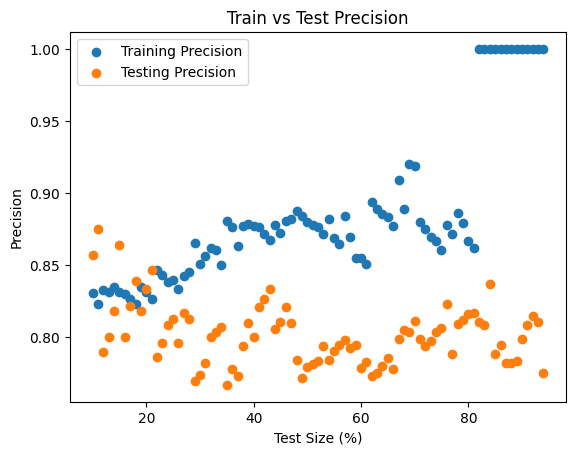

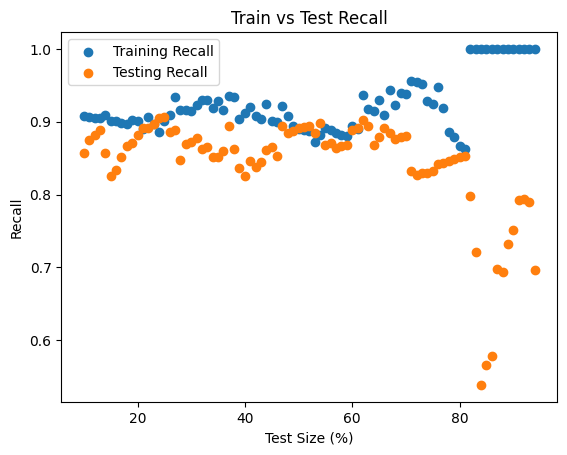

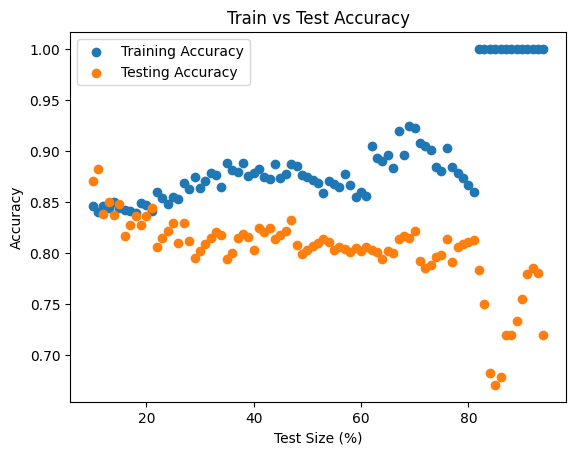

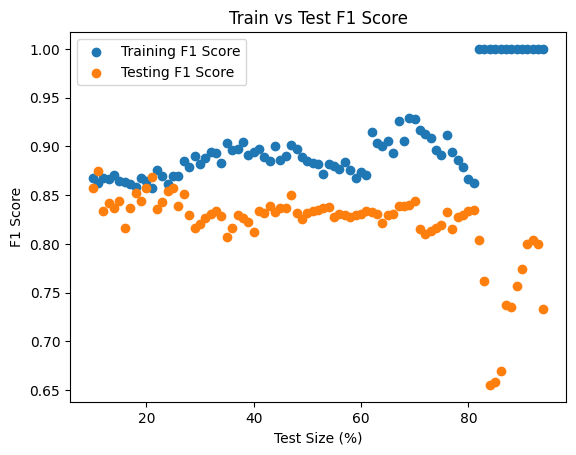

In [22]:
#scatter plots looking at the train and test data
# 1 Train and Test Precision
plt.scatter(list(range(10, 95)), training_precision, label='Training Precision')
plt.scatter(list(range(10, 95)), testing_precision, label='Testing Precision')
plt.xlabel('Test Size (%)')
plt.ylabel('Precision')
plt.title('Train vs Test Precision')
plt.legend()
plt.show()

# 2️ Train and Test Recall
plt.scatter(list(range(10, 95)), training_recall, label='Training Recall')
plt.scatter(list(range(10, 95)), testing_recall, label='Testing Recall')
plt.xlabel('Test Size (%)')
plt.ylabel('Recall')
plt.title('Train vs Test Recall')
plt.legend()
plt.show()

# 3️ Train and Test Accuracy
plt.scatter(list(range(10, 95)), training_accuracy, label='Training Accuracy')
plt.scatter(list(range(10, 95)), testing_accuracy, label='Testing Accuracy')
plt.xlabel('Test Size (%)')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.legend()
plt.show()

# 4️ Train and Test F1 Score
plt.scatter(list(range(10, 95)), training_f1, label='Training F1 Score')
plt.scatter(list(range(10, 95)), testing_f1, label='Testing F1 Score')
plt.xlabel('Test Size (%)')
plt.ylabel('F1 Score')
plt.title('Train vs Test F1 Score')
plt.legend()
plt.show()
